In [1]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
sys.path.insert(0, '/Users/gabe/projects/recombination/src')
from RecTools import *

%config InlineBackend.figure_format = 'retina'
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

ln10e10As = 3.047

As = np.exp(ln10e10As)/(10**10)
theta_s_100 = 1.04101

'''
cosmo_params = {
    "omega_b": 0.02242,
    "omega_cdm": 0.11933,
    "n_s": 0.9665,
    "tau_reio": 0.0561,
    "sigma8": 0.8102,
    "H0": 67.66
    #"A_s": As
}'''

cosmo_params = {
    "omega_b": 0.02242,
    "omega_cdm": 0.11933,
    "n_s": 0.9665,
    "tau_reio": 0.0561,
    "ln10^{10}A_s": ln10e10As,
    #"sigma8": 0.8102,
    #"100*theta_s": theta_s_100
    "H0": 67.66
}

#same as defaults
noise_parameters = {'beam_FWHM_143_arcmin' : 7.3,
                        'beam_FWHM_217_arcmin' : 4.90,
                        'weight_inv_T_143' : 0.36e-4,
                        'weight_inv_P_143' : 1.61e-4,
                        'weight_inv_T_217' : 0.78e-4,
                        'weight_inv_P_217' : 3.25e-4,
                        'fsky' : 0.8,
                        'use_143' : True,
                        'use_217' : True
                        }  

recombination_params = {"zmin_pert": 300,
                        "zmax_pert": 2500,
                        "ll_max": 2500,
                        "linear_sampling": 2*20000,
                        "Npert": 2,
                        "debug": True,
                        "inc_percent": 0.05,
                        "thermodynamics_verbose": 0,
                        'perturb_xe': 'yes',
                        "noise_params": noise_parameters
                        }

basename = "TwoPivot"

In [2]:
print("test")
generate_new = True
if generate_new:
    RecHistory = RecFisher(cosmo_params, recombination_params, basename)
    path = RecHistory.filebase
    RecHistory.compute_Fisher()
else:
    path = "/Users/gabe/projects/recombination/data/Jun02.ThetaSFull.3"

Run 10/10 took 0.46 seconds
Fisher matrices calculation completed at 06/11/2022, 23:13:59


In [3]:
print(path)
Fisher = FisherData(path)

/Users/gabe/projects/recombination/data/Jun11.TwoPivot.1
{'omega_b': '0.02242', 'omega_cdm': '0.11933', 'n_s': '0.9665', 'tau_reio': '0.0561', 'ln10^{10}A_s': '3.047', 'H0': '67.66'}


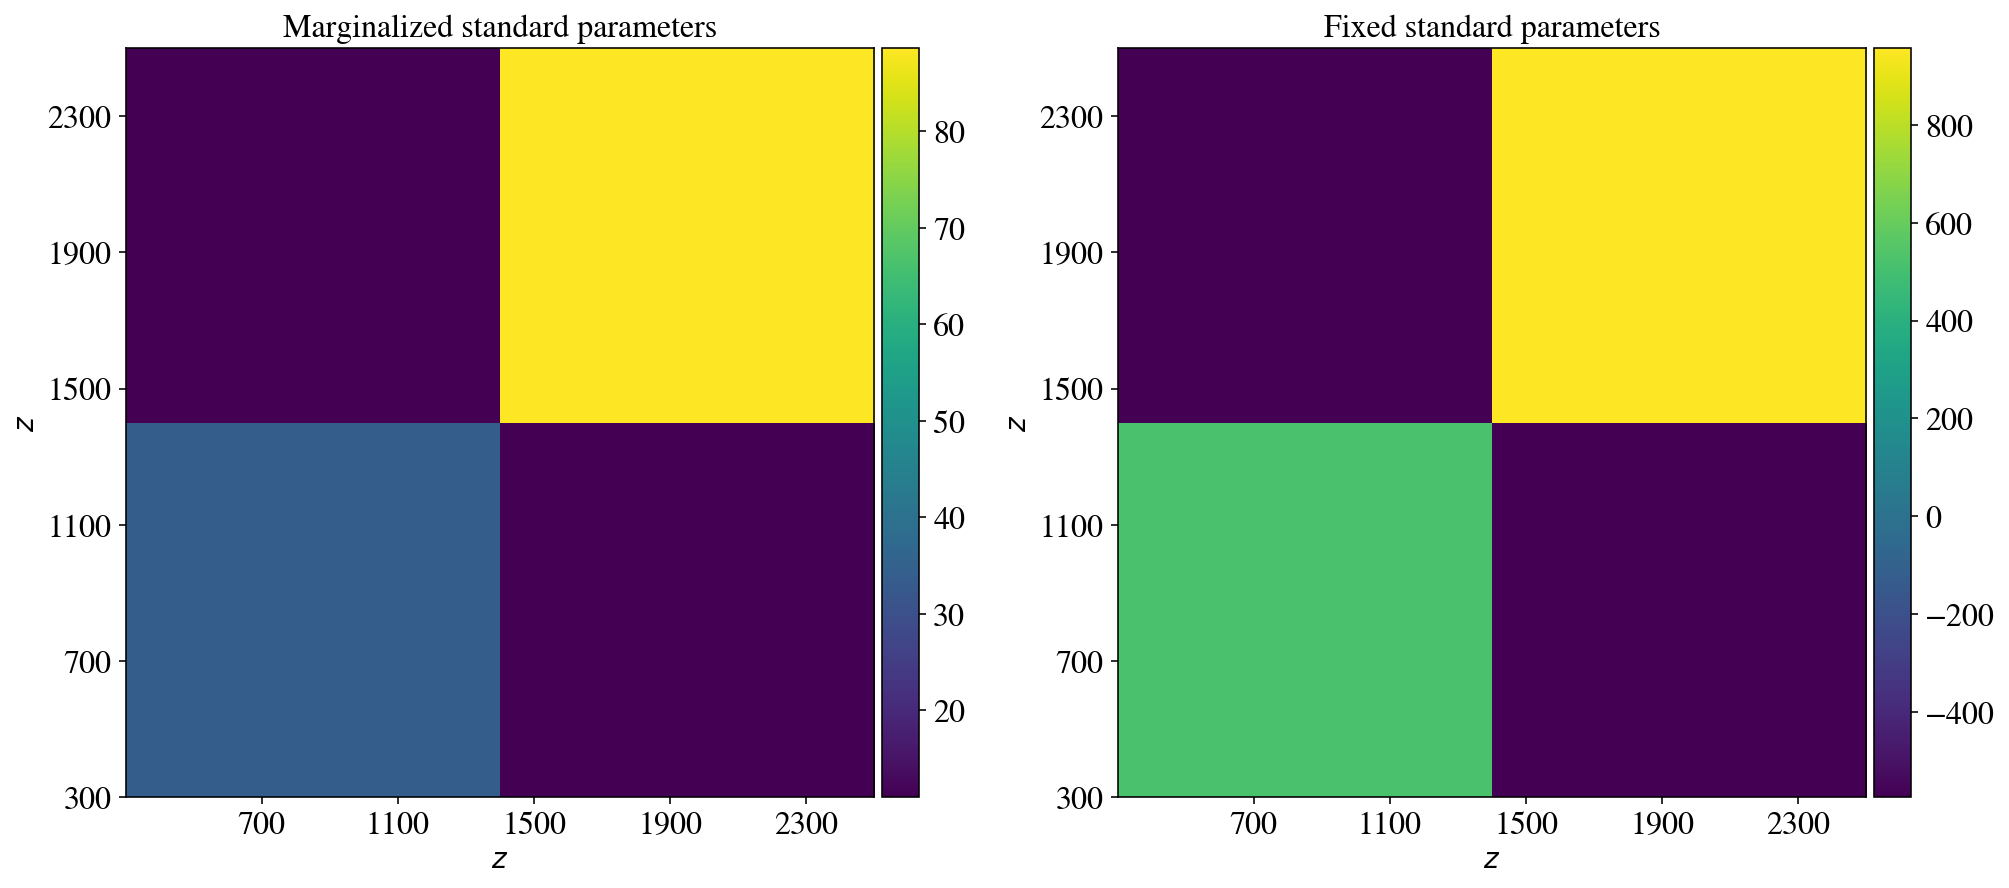

In [4]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
from matplotlib import cm
scale=2
vsize = scale*8
hsize = scale*10

fig,ax = plt.subplots(1,2, figsize=(vsize,hsize))

extent = [Fisher.zmin , Fisher.zmax, Fisher.zmin, Fisher.zmax]
xtick_list = [700, 1100, 1500, 1900, 2300]
ytick_list = [300, 700, 1100, 1500, 1900, 2300]

m=ax[0].imshow(Fisher.Fisher_marginalized, origin='lower', extent=extent, cmap=cm.viridis)

divider = make_axes_locatable(ax[0])
cax1 = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(m, cax=cax1)
ax[0].set_xticks(xtick_list)
ax[0].set_yticks(ytick_list)
ax[0].set_xlabel("$z$", fontsize=14)
ax[0].set_ylabel("$z$", fontsize=14)

ax[0].set_title("Marginalized standard parameters", fontsize=16)

amps = np.linspace(-0.025, 0.025, 10)

m=ax[1].imshow(Fisher.Fisher_fixed, origin='lower', extent=extent, cmap=cm.viridis)

divider = make_axes_locatable(ax[1])
cax2 = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(m, cax=cax2)
ax[1].set_xticks(xtick_list)
ax[1].set_yticks(ytick_list)
ax[1].set_xlabel("$z$", fontsize=14)
ax[1].set_ylabel("$z$", fontsize=14)

ax[1].set_title("Fixed standard parameters", fontsize=16)

plt.subplots_adjust(wspace=0.25)

#plt.show()

In [5]:
H0_parameterization=False

if H0_parameterization:
    standard_block = Fisher.get_reparameterized_standard_block(full=False)
else:
    standard_block = Fisher.get_standard_block()


[[ 1.11046452e-08 -5.70777172e-08  6.68330001e-08  4.53520135e-08
   5.37771265e-10  3.22879547e-05]
 [-5.70777172e-08  9.53908295e-07 -1.93904095e-06 -6.16013657e-07
   1.03301205e-06 -4.11970766e-04]
 [ 6.68330001e-08 -1.93904095e-06  7.55526899e-06  1.46363419e-06
  -3.50538382e-06  8.18242961e-04]
 [ 4.53520135e-08 -6.16013657e-07  1.46363419e-06  9.65329590e-06
   1.76193897e-05  2.78618808e-04]
 [ 5.37771265e-10  1.03301205e-06 -3.50538382e-06  1.76193897e-05
   3.91149136e-05 -3.68188471e-04]
 [ 3.22879547e-05 -4.11970766e-04  8.18242961e-04  2.78618808e-04
  -3.68188471e-04  1.90194415e-01]]
 $\Omega_b h^2$ & $\Omega_{cdm}h^2$ & $n_s$ & $\tau_{reio}$ & $\ln10^{10}A_s$ & $H_0$ & \\ 

 1.110e-08 & -5.708e-08 & 6.683e-08 & 4.535e-08 & 5.378e-10 & 3.229e-05 \\ 
 -5.708e-08 & 9.539e-07 & -1.939e-06 & -6.160e-07 & 1.033e-06 & -4.120e-04 \\ 
 6.683e-08 & -1.939e-06 & 7.555e-06 & 1.464e-06 & -3.505e-06 & 8.182e-04 \\ 
 4.535e-08 & -6.160e-07 & 1.464e-06 & 9.653e-06 & 1.762e-05 & 2.786e

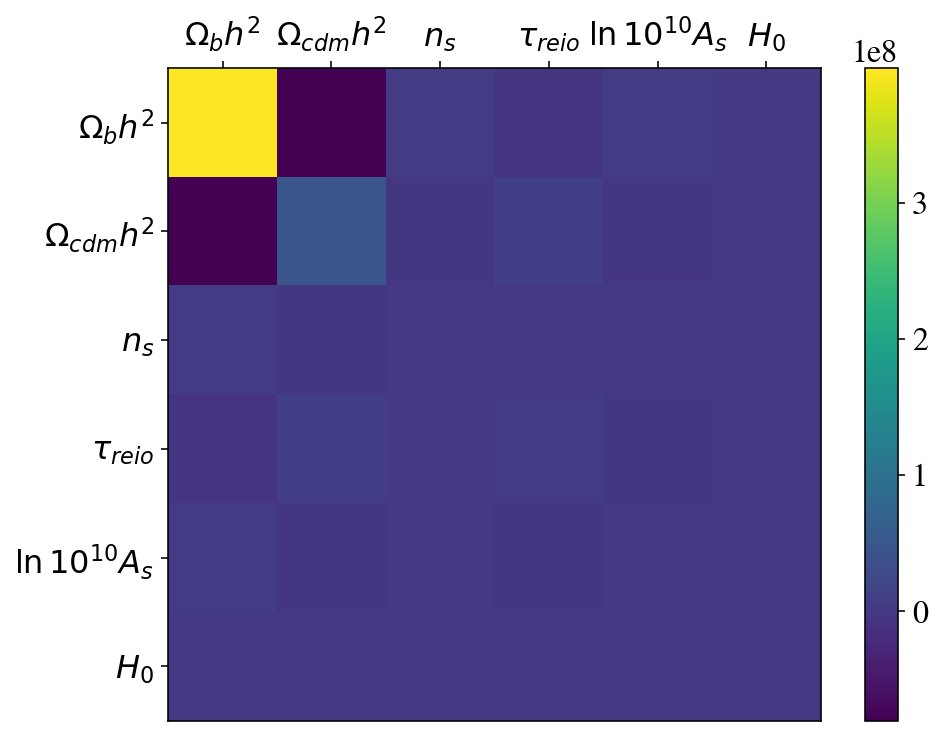

In [6]:
tick_label_list = ['$\Omega_b h^2$', '$\Omega_{cdm}h^2$', '$n_s$', '$\\tau_{reio}$', '$\ln10^{10}A_s$', '$H_0$']

divider=6

standard_cov = np.linalg.pinv(standard_block[:6, :6])
print(standard_cov)

for s in tick_label_list:
    print(" {} &".format(s), end="")
print(" \\\\ \n")
for i,row in enumerate(standard_cov[:]):
    for val in row:
        if(val==row[-1]):
            print(" {:.3e} \\\\ \n".format(val), end='')
        else:
            print(" {:.3e} &".format(val), end='')

    #print(" \\\\ \n")

fig,ax = plt.subplots()

m = ax.imshow(standard_block[:6,:6], cmap=cm.viridis)

ax.set_xticks(np.arange(divider))
ax.set_yticks(np.arange(divider))

ax.set_xticklabels(tick_label_list)
ax.set_yticklabels(tick_label_list)

#ax.set_xticklabels(cosmo_params.keys())
#ax.set_yticklabels(cosmo_params.keys())

ax.xaxis.tick_top()

plt.colorbar(m)
plt.show()

In [7]:
forecasts = np.sqrt(np.diag(standard_cov))

for entry in forecasts:
    print(" {:.3e} &".format(entry), end='')

 1.054e-04 & 9.767e-04 & 2.749e-03 & 3.107e-03 & 6.254e-03 & 4.361e-01 &

In [8]:
j = np.zeros([4,4])
np.fill_diagonal(j, 1.)
j[1,:] = [1,2,3,4]
print(j)

[[1. 0. 0. 0.]
 [1. 2. 3. 4.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
